In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [19]:
df['blood_glucose_level'].unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

In [23]:
df['blood_glucose_level'].value_counts().sort_values()

blood_glucose_level
220     603
260     635
240     636
300     674
280     729
85     6901
100    7025
158    7026
80     7106
90     7112
155    7575
200    7600
145    7679
126    7702
160    7712
140    7732
159    7759
130    7794
Name: count, dtype: int64

In [25]:
df['blood_glucose_level'].max()

300

In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.duplicated().sum()

3854

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [13]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [14]:
(df['smoking_history'] == 'No Info').sum()

32887

In [15]:
(df['gender'] == 'Other').sum()

18

Text(0.5, 1.0, 'smoking history...')

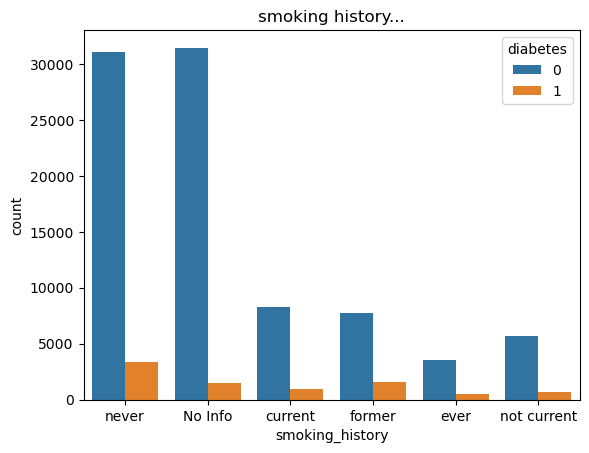

In [16]:
sns.countplot(df['smoking_history'],hue = df['diabetes'])
plt.title('smoking history...')

<AxesSubplot:xlabel='smoking_history', ylabel='count'>

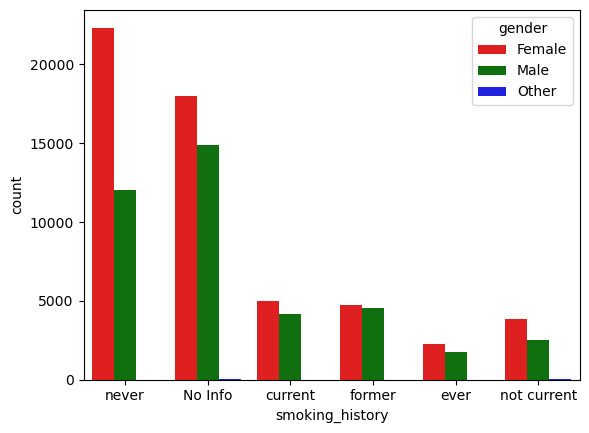

In [17]:
sns.countplot(df['smoking_history'],hue =df['gender'], palette=['red', 'green', 'blue'])

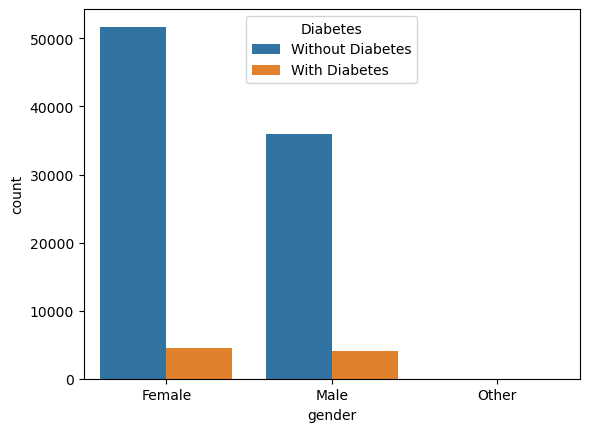

In [18]:
sns.countplot(df['gender'], hue = df['diabetes'] )
plt.legend(title='Diabetes', labels=['Without Diabetes', 'With Diabetes'])

<AxesSubplot:xlabel='gender', ylabel='age'>

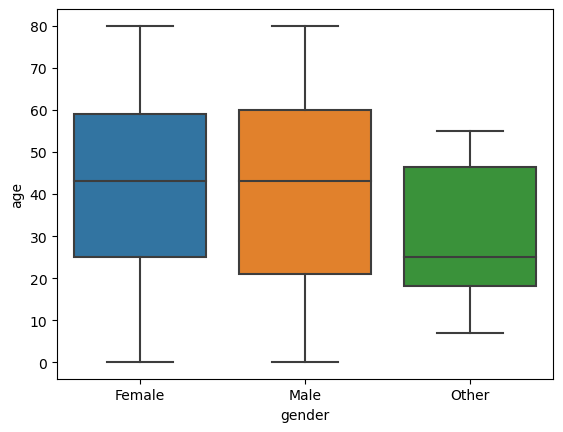

In [19]:
sns.boxplot(y = 'age', x = 'gender', data = df)

<AxesSubplot:xlabel='diabetes', ylabel='age'>

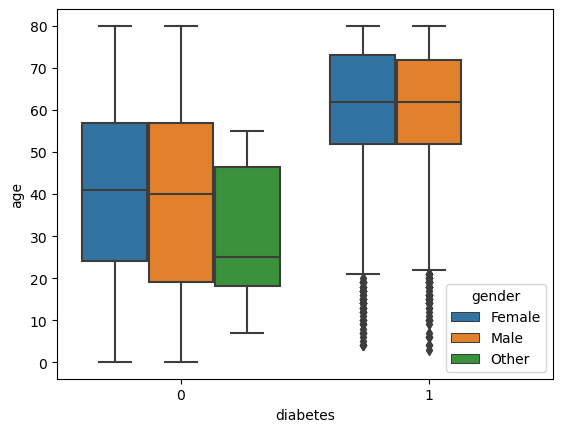

In [20]:
sns.boxplot(y = 'age', x = 'diabetes', data = df, hue = 'gender')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

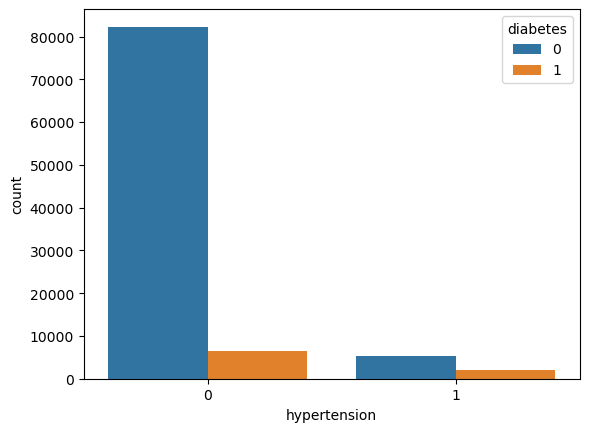

In [21]:
sns.countplot(df['hypertension'], hue = df['diabetes'])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

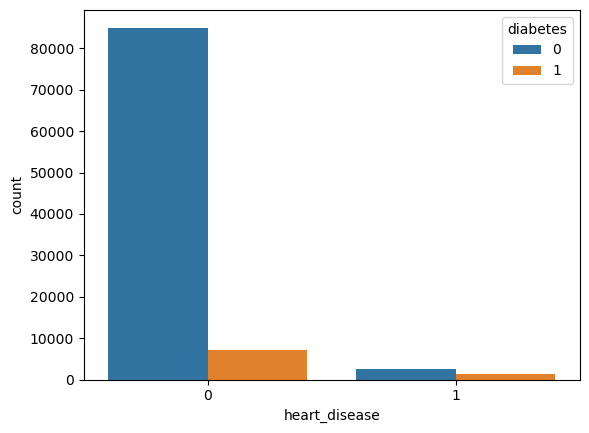

In [22]:
sns.countplot(df['heart_disease'], hue = df['diabetes'])

<AxesSubplot:xlabel='diabetes', ylabel='bmi'>

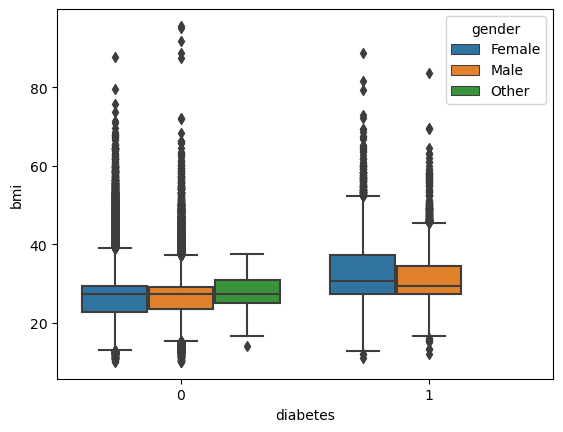

In [23]:
sns.boxplot(x = 'diabetes', y = 'bmi', data = df, hue = 'gender')

<AxesSubplot:xlabel='diabetes', ylabel='HbA1c_level'>

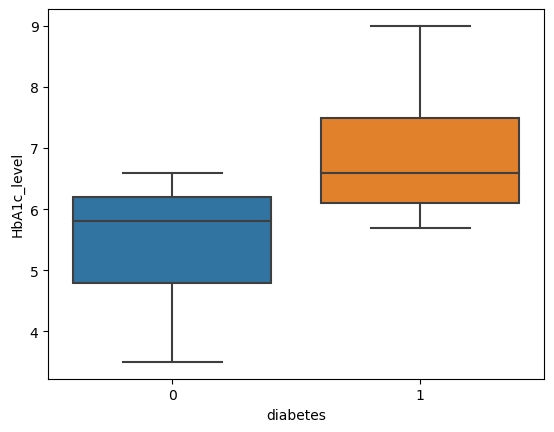

In [24]:
sns.boxplot(x=df['diabetes'], y=df['HbA1c_level'])

<AxesSubplot:xlabel='diabetes', ylabel='blood_glucose_level'>

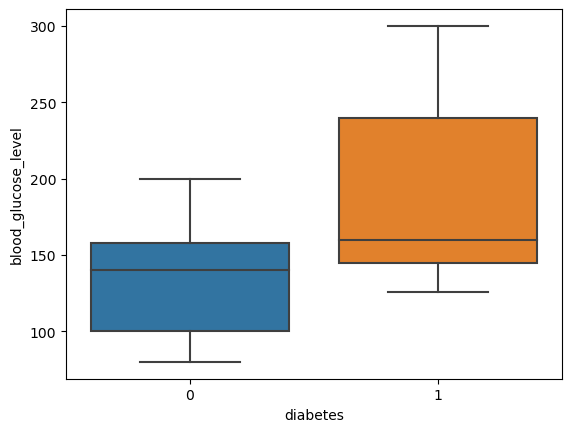

In [25]:
sns.boxplot(x = 'diabetes' , y = 'blood_glucose_level', data = df)

<AxesSubplot:>

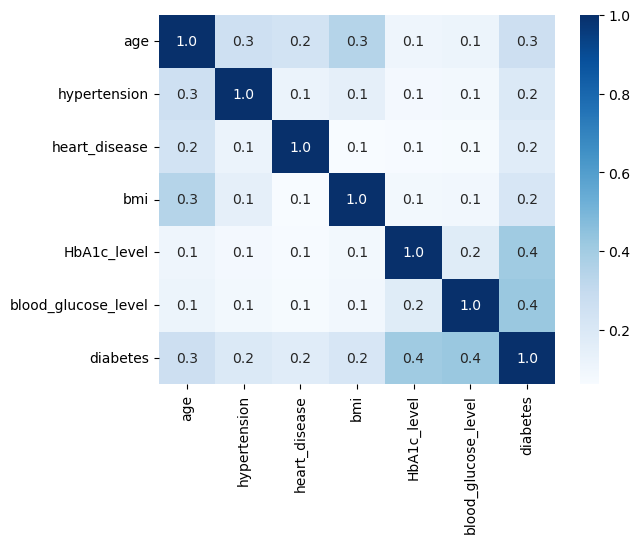

In [26]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True,  fmt=".1f")

In [27]:
dummy_df = pd.get_dummies(df[['gender', 'smoking_history']], drop_first=True)
dummy_df.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0


In [28]:
X=pd.concat([df[[ 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']], dummy_df], axis = 1)
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,0,0,0,0,1,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0]

array([1.        , 0.        , 1.        , 0.17717087, 0.56363636,
       0.27272727, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

In [30]:
y = df['diabetes']

In [31]:
y.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [32]:
# We can see our y is imbalanced. 
# So for solving this problem, we oversample our dataset with creating imaginary '1' values in dataset.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X,y = smote.fit_resample(X,y)

y.value_counts()

0    87664
1    87664
Name: diabetes, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [34]:
#algorithms

algos = {
    'logistic_regression' : {
        'model' : LogisticRegression(),
        'params' : {}
    },
    'SVM' : {
        'model' : SVC(),
        "params" : {}
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ["gini", 'entropy', 'log_loss'],
            'splitter': ['best','random']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10,20,50],
            'criterion' : ['gini', 'entropy', 'log_loss']
        }
    },
    'ada_boost_classifier' : {
        'model' : AdaBoostClassifier(),
        'params' : {
            'n_estimators' : [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'n_estimators' : [1,5,10,20,50,100],
            'loss' : ['log_loss', 'exponential']
        }
    },
    'bagging_classifier' : {
        'model' : BaggingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gaussian_naive_bayes' : {
        'model' : GaussianNB(),
        'params' :{}
    },
    'multinomial_naive_bayes' : {
        'model' : MultinomialNB(),
        'params' : {}
    }
}
# n_estimators specifies the number of weak learners(base classifiers) in the ensemble.
# A higher number of base classifiers can often improve the ensemble's performance, but it comes with increased computational cost.



In [35]:
# Logistic Regression has various hyperparameters that you can tune to optimize the model's performance, 
# such as regularization strength (C), penalty type (penalty), and solver for optimization (solver), among others.

# SVM is a powerful algorithm commonly used for classification and regression tasks. 
# It aims to find a hyperplane that best separates the classes while maximizing the margin between them. 
# It can handle linear and non-linear data by using different kernel functions.
# SVM has various hyperparameters that you can tune to optimize the model's performance, such as the kernel type (kernel), 
# regularization parameter (C), and kernel coefficient for 'poly' and 'sigmoid' (coef0), among others.

# Decision trees are versatile algorithms used for both classification and regression tasks. 
# They make decisions by traversing a tree-like structure based on the feature values, and they split the data into subsets by recursively selecting the best features to split on.
# 'criterion' hyperparameter, which determines the quality of a split, 
# 'splitter' hyperparameter, which specifies the strategy used to choose the split at each node.

# Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to 
# improve the overall performance and robustness of the model.
# 'n_estimators' hyperparameter (number of trees in the forest) and the 'criterion' hyperparameter (quality of split criterion).

# AdaBoost (short for Adaptive Boosting) is an ensemble learning technique that combines the predictions of 
# multiple weak learners (typically decision trees) to create a stronger classifier.

# Gradient Boosting is another ensemble learning technique that builds a strong classifier by iteratively adding weak learners (usually decision trees) to the ensemble.
# Each new learner is trained to correct the errors made by the ensemble up to that point.

# Bagging (Bootstrap Aggregating) is an ensemble learning technique that involves training multiple instances of a 
# base classifier on bootstrapped subsets of the training data and then combining their predictions.

# Naive Bayes classifiers are probabilistic machine learning models based on Bayes' theorem, 
# which makes strong assumptions about the independence of features given the class labels. 
# Gaussian Naive Bayes assumes that the features are normally distributed, while Multinomial Naive Bayes is typically used for discrete data
# (GaussianNB and MultinomialNB). The 'params' key is empty because Naive Bayes classifiers usually don't have many hyperparameters to tune.


In [36]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV

In [37]:
scores = []
cv = ShuffleSplit(n_splits= 5, test_size = 0.2, random_state = 10)
for algoname, mp in algos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv = cv, return_train_score = False)
    reg.fit(X, y)
    scores.append(
        {
            'model' : algoname,
            'best_score' : reg.best_score_,
            'best_params' : reg.best_params_
        }
    )

In [38]:
score = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
score

,model,best_score,best_params
0,logistic_regression,0.885302,{}
1,SVM,0.896778,{}
2,decision_tree,0.963805,"{'criterion': 'entropy', 'splitter': 'best'}"
3,random_forest,0.975338,"{'criterion': 'gini', 'n_estimators': 50}"
4,ada_boost_classifier,0.955615,{'n_estimators': 100}
5,gradient_boosting_classifier,0.956157,"{'loss': 'exponential', 'n_estimators': 100}"
6,bagging_classifier,0.976165,{'n_estimators': 50}
7,gaussian_naive_bayes,0.645235,{}
8,multinomial_naive_bayes,0.617105,{}


In [39]:
res = score.loc[score['best_score'] == score['best_score'].max()]
res

,model,best_score,best_params
6,bagging_classifier,0.976165,{'n_estimators': 50}


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=10, stratify = y)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size = 0.33, random_state = 10, stratify = y_rem)

In [41]:
model = BaggingClassifier(n_estimators = 50)
model.fit(X_train,y_train)

BaggingClassifier(n_estimators=50)

In [42]:
model.score(X_test,y_test)

0.9742629323798984

In [43]:
y_pred = model.predict(X_val)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred)
cm

array([[8520,  159],
       [ 261, 8418]], dtype=int64)

Text(0.5, 23.52222222222222, 'Actual')

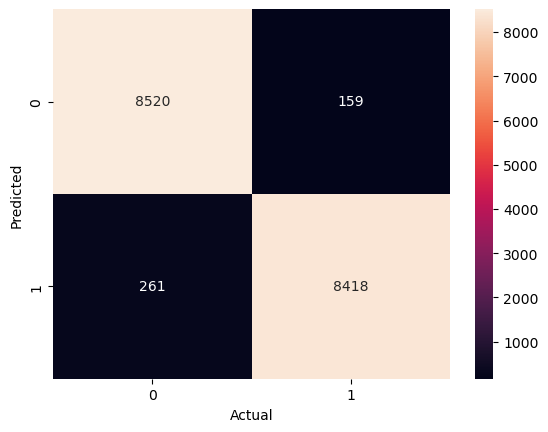

In [45]:
sns.heatmap(cm,annot = True,fmt='.0f')
plt.ylabel('Predicted')
plt.xlabel('Actual')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8679
           1       0.98      0.97      0.98      8679

    accuracy                           0.98     17358
   macro avg       0.98      0.98      0.98     17358
weighted avg       0.98      0.98      0.98     17358



In [47]:
#PCA - For reducing dimensions of dataset
from sklearn.decomposition import PCA
pca = PCA(0.95)
# the data transformed to a reduced number of dimensions while retaining at least 95% of the original variance.
X_pca = pca.fit_transform(X)
X_pca.shape

(175328, 10)

In [48]:
X_train, X_rem, y_train,y_rem = train_test_split(X_pca,y, test_size = 0.3,random_state = 10, stratify = y)
X_test, X_val, y_test,y_val = train_test_split(X_rem, y_rem, test_size = 0.33, random_state = 10, stratify = y_rem)
model = BaggingClassifier(n_estimators = 50)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9469935586390852

In [49]:
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
cm

array([[8167,  512],
       [ 390, 8289]], dtype=int64)

<AxesSubplot:>

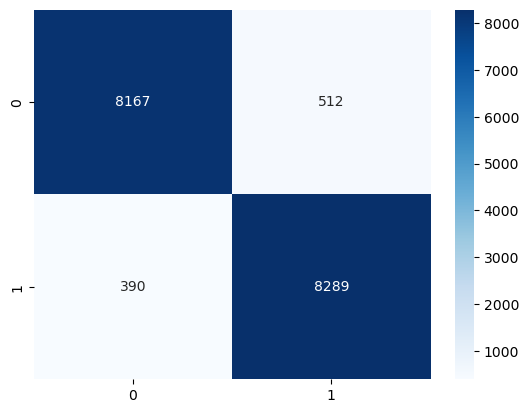

In [56]:
sns.heatmap(cm,annot = True, cmap = 'Blues',fmt = '.0f')

In [55]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8679
           1       0.94      0.96      0.95      8679

    accuracy                           0.95     17358
   macro avg       0.95      0.95      0.95     17358
weighted avg       0.95      0.95      0.95     17358



# ........THE END......

In [52]:
import pickle
pickle.dump(model,open('model.pkl','wb'))